<a href="https://colab.research.google.com/github/ToniYenC11/EmergingTech/blob/main/Programming_Assignment_4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Support Vector Classification

The code below imports libraries at different parts of the code instead of importing all at the beginning. The goal is to make it instructive to beginners such that they understand where the said libraries will be used instead of knowing it all at the very start. However, good data science practice is to import all libraries at the beginning of the task.

# Loading Datasets and Splitting

- Dataset is a dictionary containing relevant parts of the dataset. Convert `data` to Dataframe and map the `feature_names` to its columns.
- `target` will remain as a numpy array since models prefer the labels as a 1d-array. The `target_names` will also not be mapped and instead, will be used for class labelling in visualizations.
- `info` will immediately look for missing values.
- Use `train_test_split` to split, setting `test_size` to 0.30 so the rest of the data becomes the training set.

In [23]:
import sklearn.datasets
import pandas as pd

data = sklearn.datasets.load_breast_cancer()
print(data.keys())

# Convert the feature data to Dataframe
df = pd.DataFrame(data['data'])
# Map feature_names to the Dataframe
df.columns = data['feature_names']

display(df.head())
display(df.shape)
display(df.info())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

In [29]:
# Obtain the target/labels dataframe, but we don't have to map the label names to the labels itself
targets = data['target']
display(targets)
print(data['target_names'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

['malignant' 'benign']


In [31]:
# Split the dataset into 70-30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,targets,test_size = 0.30,stratify=targets)

# Data Preprocessing and Training on Default Parameters

Pipeline will include a `StandardScaler` to normalize feature values. The idea is that with normalization, the values will be closely distributed with each other since the range is from 0 to 1 only. In this way, the model learns the most efficient way with less computational resources.

Default parameters Accuracy Score: 98.83 %


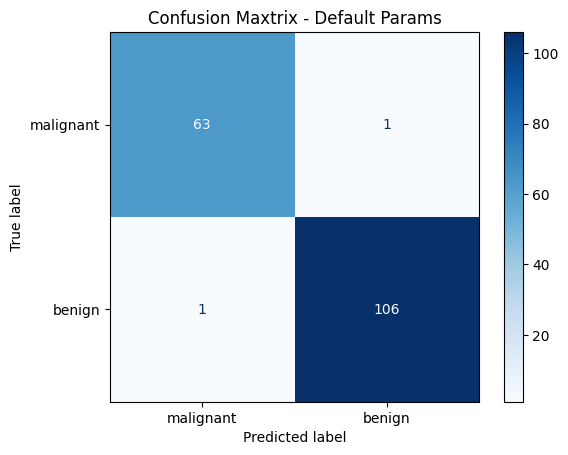

In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training with default parameters
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
SVC_default = pipe.fit(X_train, y_train)
score_default = SVC_default.score(X_test, y_test) # fit will pass the training data to the model. Score will generate accuracy score
print(f"Default parameters Accuracy Score: {round(score_default*100,2)} %")

y_pred = SVC_default.predict(X_test) # Prediction on the test set
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['target_names'])
disp.plot(cmap='Blues')
plt.title('Confusion Maxtrix - Default Params')
plt.show()

With default parameters, the model was able to achieve 98.83% accuracy on its own. The default parameters are:
- **C** (regularization parameter): 1.0
- **kernel**: rbf
- **degree**: not applicable to rbf
- **gamma**: scale

# Training Using Hyperparameter Tuning

Hyperparameter tuning will be done through `GridSearchCV`.





In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize hyperparameters plane
hyperparameters = {
    "svc__C":[1,10,30,50,70,100],
    "svc__gamma":['auto','scale',0.1,0.3,0.5,0.7,1], #* auto uses 1/n features. scale uses  1 / (n_features * X.var())
    "svc__kernel":['linear','rbf','poly']
}
#Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=pipe, param_grid = hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Best Model: ", best_model)

Best Parameters: {'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=1, gamma='auto'))])


# Evaluate the Trained Model

- Evaluate standard accuracy score on training and test set
- Identify most important features using `SelectFromModel`
- Generate Confusion Matrix and from the result, calculate accuracy, recall, precision, and F1-score.

Training Accuracy: 98.74%
Testing Accuracy: 98.83%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features:
mean radius
mean concavity
mean symmetry
texture error
perimeter error
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry


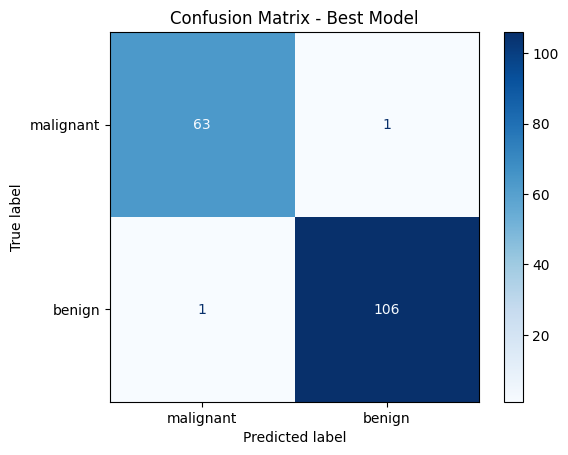


Accuracy score:0.9883040935672515
Precision score:0.984375
Recall score:0.984375
F1 score:0.984375


In [72]:
# Get predictions for training and testing sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

# Identify most important features by training a default SVC
from sklearn.feature_selection import SelectFromModel
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Apply SelectFromModel to find important features
selector = SelectFromModel(svm, prefit=True)  # prefit=True since SVM is already trained
X_selected = selector.transform(X_train)  # Transform dataset to only keep selected features

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:")
for i in list(selected_features):
  print(i)

y_pred = best_model.predict(X_test) # Prediction on the test set
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['target_names'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.show()

# Perform accuracy metrics from confusion matrix
tp, fp, fn, tn = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
print(f"\nAccuracy score:{(tp+tn)/(tp+fn+fp+tn)}")
print(f"Precision score:{precision}")
print(f"Recall score:{recall}")
print(f"F1 score:{2*(precision*recall)/(precision+recall)}")

# Guide Questions



## 1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?

- The data was first converted to dataframes with their feature names mapped into the columns.
- Exploratory Data Analysis using `head`,`shape` and `info` was done to get a general overview of the dataset.
- The `info` immediately shows the number or non-missing values in each columns, which shows no signs of it.
- Preprocessing also involes the construction of the pipeline. Part of the `Pipeline` parameters is to identify the scaling, thus the `StandardScaler` is used as required by the task.

## 2. Why is it necessary to split the dataset into training and testing sets?

- Splitting the dataset into training and testing ensures that the model does not train itself on part of the dataset as a way to gauge its accuracy on unseen data. Untrained data can usually come from external sources (another dataset), but in this example it can be derived from a portion of the dataset itself.
- It is also important that the training set should have larger portions, making 70% a reasonable size due to the large number of data available. For sparse datasets, 80% is usually used.

## 3. What is the role of StandardScaler in SVM training?

- `StandardScaler` standardizes features by removing the mean and scaling to unit variance. To remove the mean, the standard score is calculacted as $$ z = \frac{x-u}{s}$$

- Standardization also minimizes the distance between data points. Lower distance will result in more efficient learning by the model due to less calculations involved for optimization.

- Many elements used in the objective function of a learning algorithm may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

## 4. How does C affect the performance of an SVM model?

- The `C` defines the regularization parameter for the penalty function. Recall that penalty function may be L1 (Lasso) or L2 (Ridge). Varying `C` may lead to either underfitting or overfitting depending on the visualization of its cross-validation score.

## 5. What is the purpose of the kernel function in SVM?

- The kernel calculates the boundary margin between classification in SVM. This is especially useful in datasets where linear margins does not best accuractely classify the data.
- SVC applies the **kernel trick** which computes the similarity between pairs of data points using the kernel function without explicitly transforming the entire dataset.

## 6. What were the best hyperparameters found using GridSearchCV?

- The best hyperparameters are mostly the default values:
- `C` = 1
- `gamma` = auto
- `kernel` = rbf

## 7. What is a confusion matrix, and how is it interpreted?

- The confusion matrix defines the number of data points that are classified as True Positive, False Positive, False Negative, and True Negative. For example, our dataset classifies `1` as benign and `0` as malignant.

  - If a data point is actually classified as `1` and the model predicts `1` as well, it is a **True Positive**
  - If a data point is actually classified as `0`, but the model predicts it as `1`, it is a **False Positive**
  - If a data point is actually classified as `1`, but the model predicts it as `0`, it is a **False Negative**
  - If a data point is actually classified as `0` and the model predicts `0` as well, it is a **True Negative**

## 8. How are Precision, Recall, and F1-score calculated from the confusion matrix?

Given `TP` as True Positive, `TN` as True Negative, `FP` as False Positive, and `FN` as False Negative:

$$\text{Accuracy}=\frac{TP+TN}{TP+FP+FN+TN}$$

$$\text{Precision} = \frac{TP}{TP+FP}$$

$$\text{Recall} = \frac{TP}{TP+FN}$$

$$\text{F1-Score} = 2 \times \frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$

## 9. If the model does not perform well, what adjustments can be made to improve it?

- Select the best hyperparameter values using hyperparameter tuning.
- Use feature scaling through standardization techniques.
- Select best features from the dataset that best describes the model.
- Adjust the parameter values and use optimization functions (more applicable in Deep Learning).
- Reduce `C` or lower `gamma` is a model is overfitted; otherwise, collect more data.
- Increase `C` and `gamma` if a model is underfitted.